In [1]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as patches
from matplotlib.path import Path

In [2]:
from dataclasses import dataclass
from enum import Enum


class Direction(Enum):
    L = (0, -1)
    R = (0, 1)
    D = (-1, 0)
    U = (1, 0)


@dataclass
class Vertex:
    dir: Direction
    len: int
    col: str

    @classmethod
    def from_string(cls, string: str) -> "Vertex":
        parts = string.split(" ")
        return cls(Direction[parts[0]], int(parts[1]), parts[2][1:-1])


class LavaductLagoon:
    def __init__(self, input_text: str) -> None:
        self.input_text = input_text
        self.vertices = [Vertex.from_string(i) for i in input_text.strip().splitlines()]
        self.points = [(0, 0)]
        for v in self.vertices:
            self._move(v)

    def _move(self, vertex: Vertex):
        dy, dx = vertex.dir.value
        last = self.points[-1]
        self.points.append((last[0] + dy * vertex.len, last[1] + dx * vertex.len))

    @property
    def extent(self):
        y0, y1, x0, x1 = None, None, None, None
        for v in self.points:
            if y0 is None or v[0] < y0:
                y0 = v[0]
            if y1 is None or v[0] > y1:
                y1 = v[0]
            if x0 is None or v[1] < x0:
                x0 = v[1]
            if x1 is None or v[1] > x1:
                x1 = v[1]
        return y0, y1, x0, x1

    def blocks_inside(self):
        y0, y1, x0, x1 = self.extent
        print(self.extent)
        count = 0
        for y in range(y0, y1 + 1):
            for x in range(x0, x1 + 1):
                if (y, x) in self.points:
                    count += 1
        return count

    def part1(self) -> str | int:
        print(self.points)
        return self.blocks_inside()

    def part2(self) -> str | int:
        return super().part2()

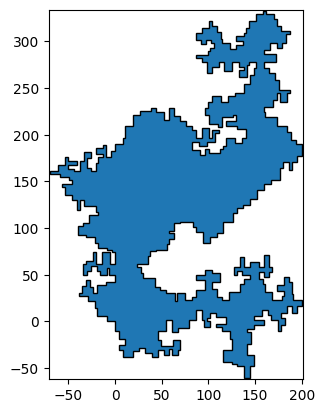

In [3]:
s = """L 9 (#2ee530)
U 6 (#14ffa3)
L 10 (#6b5400)
U 8 (#14ffa1)
L 3 (#01d650)
U 8 (#37eb83)
L 7 (#9c0f82)
U 5 (#406fa3)
L 10 (#1f7e90)
U 3 (#074881)
R 4 (#5ee970)
U 8 (#27d063)
R 4 (#89e940)
U 6 (#27d061)
R 4 (#6780e0)
D 7 (#074883)
R 3 (#3318a0)
D 7 (#4699f3)
R 5 (#450d72)
U 9 (#44b753)
R 9 (#450d70)
U 3 (#2944f3)
R 10 (#4cb000)
U 8 (#237e11)
L 7 (#0f7ff0)
U 7 (#7bafc1)
L 2 (#0f7ff2)
D 7 (#156861)
L 7 (#426ee0)
U 4 (#6ab653)
L 3 (#688b20)
U 5 (#7988c3)
L 7 (#4884c2)
D 5 (#572ed3)
L 4 (#666412)
D 4 (#572ed1)
L 4 (#48c282)
U 12 (#7565e3)
R 3 (#2ed560)
U 3 (#11bfd3)
R 7 (#7aa950)
U 9 (#11bfd1)
R 4 (#4e2ca0)
D 12 (#0e4b53)
R 6 (#652dd0)
U 12 (#049ee3)
R 8 (#238522)
D 12 (#343033)
R 6 (#5e6622)
U 12 (#343031)
L 3 (#4bcdb2)
U 3 (#421173)
L 6 (#6f8cd0)
U 2 (#08a353)
L 9 (#827572)
U 5 (#14a293)
L 4 (#46d982)
U 6 (#14a291)
L 9 (#52bec2)
U 3 (#38e5c1)
L 9 (#188ae2)
U 9 (#4d0573)
R 6 (#5b2b12)
U 3 (#4d0571)
R 6 (#409982)
U 9 (#38e5c3)
R 10 (#31b872)
U 3 (#1e0b33)
L 3 (#5e2382)
U 7 (#1e0b31)
L 12 (#415d62)
U 6 (#2e1a53)
L 5 (#935920)
D 11 (#5b0873)
L 3 (#10b382)
U 11 (#29fee1)
L 5 (#69aa92)
U 5 (#29fee3)
L 8 (#59cbe2)
U 9 (#6a6683)
L 3 (#346212)
U 3 (#1bc373)
R 11 (#737650)
U 5 (#7a2203)
L 3 (#72bc72)
U 3 (#287ea3)
L 10 (#72bc70)
U 3 (#6172a3)
L 11 (#737652)
U 3 (#468153)
R 9 (#7ef830)
U 7 (#242883)
R 7 (#219280)
U 8 (#4e8653)
R 3 (#680150)
D 4 (#521a83)
R 10 (#8b50e0)
D 4 (#5bd4b3)
L 10 (#0766f0)
D 5 (#7a6723)
R 7 (#5baef0)
D 2 (#31c1b3)
R 6 (#5aeba0)
U 11 (#59b303)
R 5 (#268450)
U 9 (#2a2d81)
R 7 (#3cf9e0)
D 6 (#2a2d83)
L 4 (#4511f0)
D 11 (#2d65c3)
R 4 (#403cd0)
D 3 (#355353)
R 5 (#388240)
U 9 (#409543)
R 3 (#5fae20)
U 6 (#2a0213)
R 5 (#3ece70)
U 3 (#4bfc21)
L 8 (#705030)
U 7 (#4a9701)
R 8 (#705032)
U 3 (#095781)
R 3 (#121090)
D 13 (#5c34a1)
R 6 (#25be80)
U 7 (#680d41)
R 4 (#10ccd0)
U 7 (#0e6dc1)
R 8 (#0c04c0)
U 7 (#805911)
R 3 (#680890)
U 12 (#162231)
R 8 (#65fe70)
U 12 (#25eb61)
R 8 (#8dadb0)
U 4 (#3e4341)
R 11 (#0243e0)
U 4 (#353171)
R 6 (#3cb8c0)
D 5 (#2c7f61)
R 8 (#6bd2a0)
D 8 (#5c8d31)
R 6 (#53b3a0)
U 13 (#384cc1)
R 5 (#617b30)
D 9 (#03f781)
R 7 (#4e4530)
D 5 (#343361)
R 6 (#66d630)
D 6 (#343363)
R 6 (#1f4810)
D 4 (#1b4bc3)
R 5 (#05e2f0)
D 9 (#678ea3)
R 6 (#42c980)
U 11 (#1f5ee3)
R 8 (#2670e0)
D 11 (#419ca1)
R 3 (#0c5eb0)
U 9 (#503f31)
R 7 (#4c8820)
D 3 (#430261)
L 4 (#1e4c50)
D 10 (#934193)
L 9 (#41db70)
D 4 (#609ca1)
L 8 (#34bfe0)
U 4 (#03f783)
L 8 (#2ef250)
D 8 (#1f9381)
R 9 (#397582)
D 6 (#7d2501)
R 5 (#235a52)
U 7 (#5d6501)
R 5 (#057992)
D 5 (#312681)
R 11 (#6e5bf2)
U 5 (#561211)
R 4 (#3a6fa2)
U 3 (#873893)
R 3 (#60a5d2)
U 8 (#5d6503)
R 9 (#132772)
D 5 (#146901)
R 8 (#12b2b2)
U 5 (#146903)
R 4 (#32ea72)
U 10 (#5400f1)
L 9 (#4f7112)
U 3 (#4783a1)
L 12 (#4f7110)
U 6 (#2ee201)
R 10 (#56c732)
U 6 (#2eb4c1)
L 3 (#5869c2)
D 2 (#0c6873)
L 11 (#62ab32)
D 11 (#64c0b3)
L 5 (#34d012)
U 4 (#1ceb73)
L 9 (#34d010)
U 9 (#4b8a73)
L 5 (#2c4b72)
U 8 (#1f7c53)
R 4 (#1de972)
U 6 (#192461)
R 4 (#353062)
U 6 (#7fa931)
R 9 (#353060)
D 6 (#36c4e1)
R 8 (#64b342)
U 6 (#0a3801)
R 7 (#025440)
U 4 (#143041)
R 10 (#3b9e20)
U 9 (#42d061)
R 7 (#64f852)
U 10 (#656b91)
R 4 (#64f850)
U 7 (#33e4b1)
R 2 (#49bf20)
U 7 (#30c543)
L 8 (#796e00)
D 3 (#565e83)
L 2 (#94dc50)
D 13 (#565e81)
L 8 (#7c08b0)
U 7 (#30c541)
R 5 (#760bb0)
U 4 (#690161)
L 5 (#232940)
U 5 (#3c9dc1)
L 8 (#71a6b0)
D 10 (#5d7671)
L 8 (#686370)
U 10 (#4d49b1)
L 6 (#213662)
D 5 (#263fa1)
L 7 (#86c7e2)
D 7 (#644a91)
L 6 (#16b772)
U 12 (#8a8a33)
L 5 (#1e0682)
U 4 (#77d461)
L 6 (#285b82)
U 3 (#1cfe11)
R 12 (#0680b0)
U 5 (#322811)
R 3 (#197b02)
U 3 (#5fee91)
R 4 (#5d4572)
U 5 (#35de91)
L 3 (#76c070)
U 4 (#6b0a11)
L 6 (#2741d0)
D 5 (#5e6823)
L 5 (#7f6c60)
U 5 (#181ce3)
L 5 (#42be90)
U 7 (#5c3273)
R 6 (#389cd0)
U 5 (#527673)
R 8 (#60b210)
U 8 (#6737e3)
R 3 (#49ffc0)
D 5 (#23b741)
R 5 (#3aeb12)
D 7 (#5afeb1)
R 4 (#647082)
D 7 (#5aa271)
R 2 (#647080)
D 5 (#156ff1)
R 8 (#3aeb10)
D 6 (#272d01)
R 7 (#1b56b0)
U 4 (#767071)
R 7 (#654e80)
U 4 (#781141)
L 7 (#1a0942)
U 6 (#38ca33)
R 8 (#344532)
U 3 (#21adf3)
R 2 (#6c2ff2)
U 5 (#59c8e3)
R 3 (#020ae2)
U 8 (#2d5193)
R 8 (#2a9172)
U 7 (#2d5e83)
R 7 (#09f4e2)
U 4 (#7018f1)
R 4 (#57de32)
D 4 (#2e23a1)
R 8 (#064b82)
D 5 (#70b481)
R 3 (#3bcec2)
D 8 (#057201)
R 5 (#0f3c72)
D 5 (#425881)
R 9 (#8aa742)
D 3 (#342001)
L 4 (#2ef592)
D 10 (#121761)
L 4 (#854cb0)
D 5 (#3a70b1)
L 6 (#3fcba0)
U 5 (#554b81)
L 7 (#3f90b0)
D 7 (#3e7f81)
L 6 (#006eb0)
D 4 (#653371)
R 12 (#0546d2)
D 9 (#1fb721)
L 12 (#535d62)
D 7 (#12e6d3)
R 5 (#42a782)
D 5 (#030943)
R 6 (#2ea392)
D 7 (#030941)
R 5 (#2fae52)
D 11 (#12e6d1)
R 11 (#090322)
D 3 (#1d24d1)
L 3 (#155242)
D 10 (#2cb771)
L 7 (#6cc5d2)
U 10 (#341c91)
L 4 (#173bc2)
D 8 (#5c9771)
L 4 (#434e92)
D 7 (#4236b1)
L 10 (#6341b2)
D 6 (#4236b3)
R 2 (#1855b2)
D 5 (#25bdf1)
R 12 (#0566c2)
D 10 (#397051)
R 11 (#1d2db2)
D 6 (#475231)
R 4 (#614872)
D 9 (#26c2e1)
R 6 (#1bd902)
D 4 (#32eb01)
R 6 (#1dbb70)
D 13 (#1ef063)
L 5 (#2ffa20)
D 6 (#32a443)
L 5 (#519200)
D 9 (#32a441)
L 4 (#20c450)
U 9 (#3f0e33)
L 6 (#04a0a0)
D 7 (#5cc0d3)
L 3 (#257810)
D 12 (#2e3061)
L 10 (#4df090)
D 5 (#649e61)
L 8 (#061fa0)
D 6 (#090041)
L 7 (#288790)
D 10 (#2c3851)
L 8 (#74e210)
D 6 (#2c3853)
L 7 (#00bbc0)
D 4 (#1ef061)
L 6 (#064340)
D 5 (#48a201)
L 5 (#72c5e2)
D 9 (#523e71)
L 10 (#578eb2)
D 12 (#585db1)
L 7 (#1f30d2)
D 5 (#0dbdd1)
L 7 (#545132)
D 6 (#0e8d91)
L 8 (#293790)
U 12 (#619691)
L 7 (#60c2d0)
U 5 (#1742c3)
L 4 (#1707e0)
U 6 (#22f0f1)
L 13 (#0a8f20)
D 2 (#14acb1)
L 7 (#6512f0)
D 8 (#6f86a1)
L 5 (#0b6fb0)
D 2 (#409341)
R 5 (#6c37f0)
D 7 (#0168f3)
L 5 (#3f7660)
D 5 (#417793)
L 2 (#57f4f2)
D 6 (#0bd113)
L 12 (#099800)
D 2 (#4dc503)
L 7 (#099802)
D 5 (#4749c3)
L 2 (#57f4f0)
D 9 (#03f733)
L 12 (#0ea1d0)
D 3 (#1742c1)
R 5 (#293920)
D 6 (#14d761)
R 2 (#746850)
D 6 (#2d7331)
R 13 (#728a50)
D 9 (#2d7333)
R 5 (#13c1c0)
D 3 (#5a55c1)
R 7 (#8135d0)
D 4 (#3a5821)
R 9 (#0e2950)
D 8 (#3a69b1)
R 2 (#44c4c2)
U 8 (#49c381)
R 9 (#44c4c0)
D 7 (#3ec4a1)
R 7 (#1d6772)
U 3 (#2ebbb1)
R 5 (#0dde42)
U 8 (#305d51)
R 9 (#542a62)
U 10 (#56fc71)
L 9 (#1e1572)
U 6 (#313291)
R 9 (#058762)
U 5 (#2d9c31)
R 8 (#173092)
D 3 (#49a5d3)
R 8 (#03d872)
D 10 (#3eed33)
L 8 (#03d870)
D 7 (#44f2c3)
R 5 (#504132)
D 9 (#44e7f3)
R 5 (#814902)
D 3 (#027683)
R 8 (#566fe2)
U 9 (#060e01)
R 12 (#49b352)
U 8 (#1d5661)
R 4 (#2c53b0)
U 5 (#6b39e1)
R 6 (#52fdc0)
U 5 (#25db73)
L 8 (#29eaf0)
U 4 (#25db71)
L 5 (#3f6ce0)
D 4 (#3535d1)
L 4 (#49bbe2)
U 8 (#2738a3)
R 7 (#756482)
U 11 (#2738a1)
R 4 (#2988e2)
D 11 (#02fca1)
R 6 (#192a82)
U 6 (#67dba1)
R 10 (#75f442)
D 6 (#2b3a51)
R 5 (#117142)
U 13 (#248943)
R 6 (#91c3d2)
D 13 (#248941)
R 3 (#00b892)
D 5 (#12f861)
L 3 (#0620d2)
D 5 (#4ef3b1)
L 5 (#2498c2)
U 5 (#385601)
L 6 (#29ce02)
D 8 (#376a81)
R 4 (#30d012)
D 5 (#23e493)
R 3 (#5d60b2)
D 8 (#848a13)
R 7 (#22b0f2)
D 9 (#36f331)
R 11 (#04b550)
U 4 (#257851)
R 2 (#04b552)
U 6 (#4c0321)
L 8 (#258f72)
U 6 (#247543)
R 8 (#3da442)
U 9 (#313343)
R 5 (#6ab1b2)
D 6 (#73a813)
R 3 (#0dcda2)
D 13 (#6d4583)
R 2 (#51e232)
D 6 (#1e95f3)
R 9 (#6332e2)
D 7 (#5f7223)
L 5 (#053e92)
D 7 (#208543)
L 6 (#1e3f82)
U 7 (#0368c3)
L 5 (#6fa270)
D 7 (#4d7d93)
L 6 (#0d8a70)
D 5 (#38ad13)
R 4 (#0d8a72)
D 8 (#46d1c3)
L 4 (#3da9f0)
D 6 (#42a123)
L 4 (#2b46c0)
U 11 (#5fd0d3)
L 7 (#2d5dd2)
U 6 (#4b50e3)
L 3 (#62fb72)
U 5 (#23cb83)
L 7 (#1f4562)
D 6 (#844733)
L 8 (#1f4560)
D 5 (#0f3c53)
R 10 (#35bed2)
D 5 (#0e6d73)
L 10 (#4dd192)
D 4 (#6e0601)
L 8 (#42b6c2)
D 3 (#6e0603)
R 5 (#3754a2)
D 13 (#5ccd13)
L 5 (#3221d2)
D 12 (#2efff3)
R 8 (#899f62)
D 12 (#4a4993)
L 5 (#2ce212)
D 13 (#32b423)
L 6 (#2d4ff2)
U 13 (#057dd3)
L 7 (#881722)
U 2 (#057dd1)
L 6 (#300972)
U 3 (#6e8593)
L 9 (#3b9cf0)
U 12 (#434f73)
R 9 (#7ed4c0)
U 12 (#307143)
L 2 (#2afed0)
U 9 (#64b4b3)
L 8 (#81b252)
U 4 (#3b1b83)
L 7 (#3bea42)
U 3 (#002181)
R 11 (#78d502)
U 8 (#002183)
L 11 (#2a9612)
U 4 (#569aa3)
L 6 (#39f100)
D 5 (#85bf33)
L 4 (#204170)
D 4 (#85bf31)
R 4 (#4af060)
D 6 (#32ee33)
L 7 (#260090)
U 7 (#600543)
L 2 (#5a3890)
U 11 (#0d8dc3)
L 6 (#2560e0)
D 10 (#7a8d43)
L 8 (#5daed2)
D 9 (#1ef063)
L 12 (#31ac32)
D 4 (#6ba891)
L 6 (#2cd302)
U 13 (#6ba893)
L 6 (#49a4e2)
D 12 (#1ef061)
L 9 (#44e9f2)
D 10 (#58adc3)
R 3 (#425842)
D 6 (#0a8503)
R 13 (#39aa52)
U 6 (#0a8501)
R 8 (#371d22)
D 11 (#0ba1a3)
L 3 (#5bbaf2)
D 5 (#7cb2f3)
L 6 (#2677a2)
U 6 (#37f2c1)
L 3 (#900172)
D 6 (#2b1251)
L 6 (#245ed2)
U 5 (#630513)
L 6 (#1ec542)
D 7 (#59e363)
L 6 (#843450)
U 4 (#406233)
L 8 (#450400)
U 6 (#997ff1)
L 6 (#2fd6d0)
D 4 (#997ff3)
L 7 (#2a5340)
D 6 (#406231)
L 11 (#31f5b0)
U 7 (#121183)
L 4 (#053ae2)
U 6 (#88cca3)
R 7 (#053ae0)
U 6 (#114cd3)
L 7 (#2d4c62)
U 9 (#1eff63)
L 4 (#48d402)
U 10 (#470983)
"""


def plot(lagoon, draw_colors=False):
    verts = lagoon.points
    points = [(x, y, v.col) for v, (y, x) in zip(lagoon.vertices, lagoon.points)]

    fig, ax = plt.subplots()
    path = Path([(x, y) for (y, x) in verts], closed=False)
    patch = patches.PathPatch(path)
    ax.add_patch(patch)
    if draw_colors:
        for x, y, col in points:
            ax.scatter(x, y, color=col)
    ax.set_xlim(min(x for y, x in verts) - 1, max(x for y, x in verts) + 1)
    ax.set_ylim(min(y for y, x in verts) - 1, max(y for y, x in verts) + 1)
    ax.set_aspect(1)
    plt.show()


plot(LavaductLagoon(s), False)

In [4]:
l1 = LavaductLagoon(
    """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
"""
)
l1.points

[(0, 0),
 (0, 6),
 (-5, 6),
 (-5, 4),
 (-7, 4),
 (-7, 6),
 (-9, 6),
 (-9, 1),
 (-7, 1),
 (-7, 0),
 (-5, 0),
 (-5, 2),
 (-2, 2),
 (-2, 0),
 (0, 0)]

In [5]:
def area(vs, boundary=0):
    """Returns area bound by vertices.

    Employs Shoelace formula.
    """
    a = 0
    ab = 0
    y0, x0 = vs[0]
    for [y1, x1] in vs[1:]:
        dx = x1 - x0
        dy = y1 - y0
        a += 0.5 * (y0 * dx - x0 * dy)
        if boundary:
            ab += abs(dy) + abs(dx)
        x0 = x1
        y0 = y1
    return a + (ab / 2 + 1 if boundary else 0)


area(l1.points, 1)

62.0

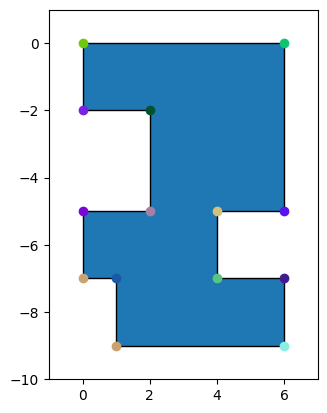

In [6]:
plot(l1, True)